Combining all the 4 models for ensemble Technique

In [26]:
 import numpy as np
import pandas as pd
import cv2
import keras
from numpy import random
import tensorflow as tf
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, Activation
from keras.layers import MaxPooling2D, BatchNormalization
from keras.optimizers import SGD
! pip install np_utils
from keras.applications import MobileNet, VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import classification_report ,confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import class_weight
import seaborn as sns
import os

In [27]:
# Directory of train, validation and test

train_folder = "/content/drive/MyDrive/Chect_data/train"
valid_folder = "/content/drive/MyDrive/Chect_data/valid"
test_folder = "/content/drive/MyDrive/Chect_data/test"

In [28]:
print("\n\n\t\tTraining Set")
print("\t  ========================\n")
train_c = []
for folder in os.listdir(train_folder):
    train_c.append(folder)
    print("\nTrain "+ folder + " Class: ", len(os.listdir(train_folder + '/' + folder)))

print("\n\n", train_c)

print("\n\n\t\tTesting Set")
print("\t  ========================\n")
test_c = []
for folder in os.listdir(test_folder):
    test_c.append(folder)
    print("\nTest "+ folder + " Class: ", len(os.listdir(test_folder + '/' + folder)))

print("\n\n", test_c)

print("\n\n\t\tValidation Set")
print("\t  ========================\n")
val_c = []
for folder in os.listdir(valid_folder):
    val_c.append(folder)
    print("\nValidation "+ folder + " Class: ", len(os.listdir(valid_folder + '/' + folder)))

print("\n\n", val_c, "\n")



		Training Set


Train normal Class:  148

Train squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa Class:  155

Train adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib Class:  195

Train large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa Class:  115


 ['normal', 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa', 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib', 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa']


		Testing Set


Test squamous.cell.carcinoma Class:  90

Test normal Class:  54

Test adenocarcinoma Class:  120

Test large.cell.carcinoma Class:  51


 ['squamous.cell.carcinoma', 'normal', 'adenocarcinoma', 'large.cell.carcinoma']


		Validation Set


Validation normal Class:  13

Validation squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa Class:  15

Validation large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa Class:  21

Validation adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib Class:  23


 ['normal', 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa', 'large.cell.carcinoma_left.hilum_T2_N2_M0

In [29]:
input_shape = (224,224,3)
num_class = 4

train_datagen = ImageDataGenerator(
    dtype='float32',
    preprocessing_function=preprocess_input,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False
)
val_datagen = ImageDataGenerator(
    dtype='float32',
    preprocessing_function=preprocess_input,
)
test_datagen = ImageDataGenerator(
    dtype='float32',
    preprocessing_function=preprocess_input,
)

train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
)
test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle = False,
)
validation_generator = val_datagen.flow_from_directory(
    valid_folder,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
)

Found 613 images belonging to 4 classes.
Found 315 images belonging to 4 classes.
Found 72 images belonging to 4 classes.


In [30]:
# Get list of class weights
class_weights_list = class_weight.compute_class_weight(
           class_weight='balanced',
            classes=np.unique(train_generator.classes),
            y=train_generator.classes)
# Get class labels
class_labels=np.unique(train_generator.classes)

# Put weights in dict with class label
class_weights = {}
for class_i in range(len(class_labels)):
     class_weights[class_labels[class_i]] = class_weights_list[class_i]

# Check
class_weights

{0: 0.7858974358974359,
 1: 1.3326086956521739,
 2: 1.035472972972973,
 3: 0.9887096774193549}

In [31]:
# Modelling
# 1. VGG16
# 2. AlexNet
# 3. InceptionV3


In [32]:
#ALEXNET

In [33]:
modelVGG16 = VGG16(weights = 'imagenet',
                     include_top = False,
                     input_shape = input_shape)

for layer in modelVGG16.layers:
    layer.trainable = False

In [34]:
model1 = Sequential([
    modelVGG16,
    BatchNormalization(),
    MaxPooling2D(pool_size = (2,2)),
    Dropout(.3),
    Flatten(),
    Dense(1024, activation = 'relu'),
    Dropout(.3),
    Dense(512, activation = 'relu'),
    Dropout(.3),
    Dense(256, activation = 'relu'),
    Dropout(.3),
    Dense(num_class, activation = 'softmax')
])


#print(model.summary())

In [35]:
opt = tf.keras.optimizers.Adam(learning_rate = 0.001)
opt1 = tf.keras.optimizers.RMSprop(learning_rate = 0.001)

model1.compile(loss = 'categorical_crossentropy',
             optimizer = opt,
             metrics = ['accuracy'])

In [36]:
epochs = 50

model1.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    class_weight=class_weights,
    verbose=1
)

#test = test_generator
#score = model.evaluate(test, verbose = 1)
#print("Test loss:", score[0])
#print("Test accuracy:", score[1])

Epoch 1/50
20/20 [==============================] - 23s 1s/step - loss: 2.2728 - accuracy: 0.3801 - val_loss: 1.6133 - val_accuracy: 0.4722
Epoch 2/50
20/20 [==============================] - 22s 1s/step - loss: 1.2937 - accuracy: 0.5400 - val_loss: 1.1166 - val_accuracy: 0.5278
Epoch 3/50
20/20 [==============================] - 13s 636ms/step - loss: 1.1617 - accuracy: 0.5400 - val_loss: 0.7941 - val_accuracy: 0.5972
Epoch 4/50
20/20 [==============================] - 13s 638ms/step - loss: 0.8702 - accuracy: 0.5775 - val_loss: 0.8801 - val_accuracy: 0.6250
Epoch 5/50
20/20 [==============================] - 12s 611ms/step - loss: 0.8627 - accuracy: 0.6248 - val_loss: 0.8420 - val_accuracy: 0.6389
Epoch 6/50
20/20 [==============================] - 12s 591ms/step - loss: 0.8288 - accuracy: 0.6509 - val_loss: 0.7309 - val_accuracy: 0.6667
Epoch 7/50
20/20 [==============================] - 15s 749ms/step - loss: 0.7252 - accuracy: 0.6754 - val_loss: 0.6149 - val_accuracy: 0.7361
Epoch

NameError: ignored

In [37]:
num_test_samples = len(test_generator)
num_classes = len(test_generator.class_indices)

predicted_probabilities_vgg16 = model1.predict(test_generator, steps=num_test_samples)

10/10 [==============================] - 3s 280ms/step


In [38]:
# ALEXNET

In [39]:
# (3) Create a sequential model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11),\
 strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))

# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(4))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 activation (Activation)     (None, 54, 54, 96)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 27, 27, 96)        0         
 g2D)                                                            
                                                                 
 batch_normalization_3 (Bat  (None, 27, 27, 96)        384       
 chNormalization)                                                
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 256)       2973952   
                                                                 
 activation_1 (Activation)   (None, 17, 17, 256)      

In [40]:
opt = tf.keras.optimizers.Adam(learning_rate = 0.001)
opt1 = tf.keras.optimizers.RMSprop(learning_rate = 0.001)

model.compile(loss = 'categorical_crossentropy',
             optimizer = opt,
             metrics = ['accuracy'])

In [41]:
epochs = 50

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    class_weight=class_weights,
    verbose=1
)
test = test_generator
score = model.evaluate(test, verbose = 1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/50
20/20 [==============================] - 71s 476ms/step - loss: 2.0854 - accuracy: 0.4584 - val_loss: 1669.7186 - val_accuracy: 0.1806
Epoch 2/50
20/20 [==============================] - 14s 695ms/step - loss: 1.4975 - accuracy: 0.4780 - val_loss: 226.8793 - val_accuracy: 0.1806
Epoch 3/50
20/20 [==============================] - 12s 584ms/step - loss: 1.2074 - accuracy: 0.5334 - val_loss: 34.7279 - val_accuracy: 0.1111
Epoch 4/50
20/20 [==============================] - 10s 501ms/step - loss: 1.2081 - accuracy: 0.5090 - val_loss: 24.8095 - val_accuracy: 0.1806
Epoch 5/50
20/20 [==============================] - 12s 609ms/step - loss: 1.0735 - accuracy: 0.5498 - val_loss: 22.8586 - val_accuracy: 0.1944
Epoch 6/50
20/20 [==============================] - 12s 603ms/step - loss: 1.1016 - accuracy: 0.5449 - val_loss: 4.4640 - val_accuracy: 0.3056
Epoch 7/50
20/20 [==============================] - 11s 571ms/step - loss: 1.0314 - accuracy: 0.5612 - val_loss: 6.5096 - val_accuracy

In [42]:
num_test_samples = len(test_generator)
num_classes = len(test_generator.class_indices)

predicted_probabilities_AlexNet = model.predict(test_generator, steps=num_test_samples)

10/10 [==============================] - 2s 219ms/step


In [43]:
inception_v3 = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

87910968/87910968 [==============================] - 5s 0us/step


In [44]:
for layer in inception_v3.layers[: -15]:
    layer.trainable = False

In [45]:
x = inception_v3.output
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)

output = Dense(units=4, activation='softmax')(x)
model = Model(inception_v3.input, output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_5 (Conv2D)           (None, 111, 111, 32)         864       ['input_3[0][0]']             
                                                                                                  
 batch_normalization_11 (Ba  (None, 111, 111, 32)         96        ['conv2d_5[0][0]']            
 tchNormalization)                                                                                
                                                                                                  
 activation_9 (Activation)   (None, 111, 111, 32)         0         ['batch_normalization_11[0

In [46]:
opt = tf.keras.optimizers.Adam(learning_rate = 0.001)
opt1 = tf.keras.optimizers.RMSprop(learning_rate = 0.001)

model.compile(loss = 'categorical_crossentropy',
             optimizer = opt,
             metrics = ['accuracy'])

In [47]:
epochs = 50

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    class_weight=class_weights,
    verbose=1
)
test = test_generator
score = model.evaluate(test, verbose = 1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/50
20/20 [==============================] - 23s 638ms/step - loss: 46.5467 - accuracy: 0.3377 - val_loss: 15.7559 - val_accuracy: 0.4722
Epoch 2/50
20/20 [==============================] - 11s 529ms/step - loss: 17.3311 - accuracy: 0.4192 - val_loss: 4.9546 - val_accuracy: 0.4861
Epoch 3/50
20/20 [==============================] - 12s 619ms/step - loss: 7.3039 - accuracy: 0.3964 - val_loss: 2.5117 - val_accuracy: 0.4444
Epoch 4/50
20/20 [==============================] - 12s 620ms/step - loss: 3.4427 - accuracy: 0.4405 - val_loss: 1.7002 - val_accuracy: 0.5278
Epoch 5/50
20/20 [==============================] - 11s 526ms/step - loss: 2.1134 - accuracy: 0.3491 - val_loss: 1.2743 - val_accuracy: 0.4167
Epoch 6/50
20/20 [==============================] - 13s 611ms/step - loss: 1.5010 - accuracy: 0.4062 - val_loss: 1.2333 - val_accuracy: 0.5278
Epoch 7/50
20/20 [==============================] - 13s 639ms/step - loss: 1.4119 - accuracy: 0.4307 - val_loss: 1.2371 - val_accuracy: 0.5

In [48]:
num_test_samples = len(test_generator)
num_classes = len(test_generator.class_indices)

predicted_probabilities_inception_v3 = model.predict(test_generator, steps=num_test_samples)

10/10 [==============================] - 4s 233ms/step


In [57]:
modelResNet50 = ResNet50(weights = 'imagenet',
                     include_top = False,
                     input_shape = input_shape)

for layer in modelResNet50.layers:
    layer.trainable = False

94765736/94765736 [==============================] - 5s 0us/step


In [58]:
model = Sequential([
    modelResNet50,
    BatchNormalization(),
    MaxPooling2D(pool_size = (2,2)),
    Dropout(.3),
    Flatten(),
    Dense(1024, activation = 'relu'),
    Dropout(.3),
    Dense(512, activation = 'relu'),
    Dropout(.3),
    Dense(256, activation = 'relu'),
    Dropout(.3),
    Dense(num_class, activation = 'softmax')
])


print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 batch_normalization_105 (B  (None, 7, 7, 2048)        8192      
 atchNormalization)                                              
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 3, 3, 2048)        0         
 ng2D)                                                           
                                                                 
 dropout_17 (Dropout)        (None, 3, 3, 2048)        0         
                                                                 
 flatten_5 (Flatten)         (None, 18432)             0         
                                                                 
 dense_19 (Dense)            (None, 1024)             

In [60]:
opt = tf.keras.optimizers.Adam(learning_rate = 0.001)
opt1 = tf.keras.optimizers.RMSprop(learning_rate = 0.001)

model.compile(loss = 'categorical_crossentropy',
             optimizer = opt,
             metrics = ['accuracy'])

In [61]:
epochs = 50

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    class_weight=class_weights,
    verbose=1
)

Epoch 1/50
20/20 [==============================] - 26s 1s/step - loss: 4.4462 - accuracy: 0.4192 - val_loss: 3.6642 - val_accuracy: 0.4722
Epoch 2/50
20/20 [==============================] - 14s 689ms/step - loss: 2.7088 - accuracy: 0.5269 - val_loss: 1.4525 - val_accuracy: 0.3750
Epoch 3/50
20/20 [==============================] - 13s 655ms/step - loss: 1.9518 - accuracy: 0.5090 - val_loss: 1.1467 - val_accuracy: 0.4444
Epoch 4/50
20/20 [==============================] - 13s 650ms/step - loss: 1.4634 - accuracy: 0.5171 - val_loss: 0.9934 - val_accuracy: 0.5417
Epoch 5/50
20/20 [==============================] - 12s 613ms/step - loss: 1.2246 - accuracy: 0.5742 - val_loss: 0.8483 - val_accuracy: 0.5972
Epoch 6/50
20/20 [==============================] - 13s 649ms/step - loss: 0.9935 - accuracy: 0.6134 - val_loss: 0.8652 - val_accuracy: 0.5694
Epoch 7/50
20/20 [==============================] - 13s 654ms/step - loss: 0.9703 - accuracy: 0.6346 - val_loss: 0.8325 - val_accuracy: 0.5694
Ep

In [62]:
num_test_samples = len(test_generator)
num_classes = len(test_generator.class_indices)

predicted_probabilities_resnet50 = model.predict(test_generator, steps=num_test_samples)

10/10 [==============================] - 4s 358ms/step


In [66]:
arr=[]
for i in range(len(predicted_probabilities_inception_v3)):
  temp=[]
  for j in range(4):
    temp.append((predicted_probabilities_inception_v3[i][j]+predicted_probabilities_vgg16[i][j]+predicted_probabilities_AlexNet[i][j]+predicted_probabilities_resnet50[i][0])/4)
  arr.append(temp)

In [67]:
predicted_labels = np.argmax(arr, axis=1)

true_labels = test_generator.classes

report = classification_report(true_labels, predicted_labels)

print(report)

              precision    recall  f1-score   support

           0       0.84      0.91      0.88       120
           1       0.79      0.98      0.88        51
           2       1.00      1.00      1.00        54
           3       0.96      0.73      0.83        90

    accuracy                           0.89       315
   macro avg       0.90      0.91      0.90       315
weighted avg       0.90      0.89      0.88       315





Confusion Matrix:
 [[109   8   0   3]
 [  1  50   0   0]
 [  0   0  54   0]
 [ 19   5   0  66]]


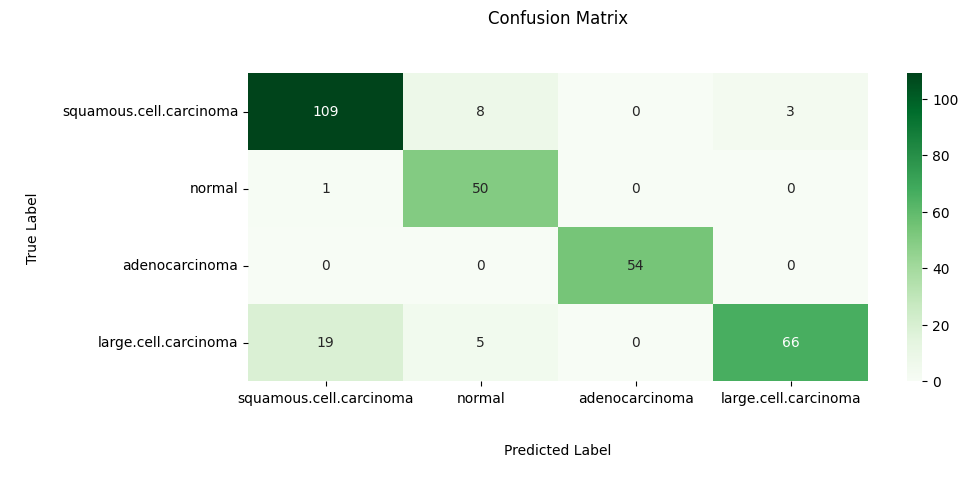

In [68]:
cm = confusion_matrix(true_labels, predicted_labels)
print("\n\nConfusion Matrix:\n", cm)

plt.figure(figsize=(10,4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Greens', xticklabels = test_c, yticklabels = test_c)
plt.xlabel('\n\nPredicted Label\n')
plt.ylabel('\nTrue Label\n')
plt.title('Confusion Matrix\n\n')
plt.show()